# Hand written Digits Recognition with a CNN

**Instructions**

To create new samples:

1. Take a picture of an hand written number
2. Convert it in black and white on this website: https://blackandwhite.imageonline.co
3. If necessary, reverse the colors such that the number is white and the background is black: https://pinetools.com/invert-image-colors
4. it might be good to once more pass through the black-white filter: https://blackandwhite.imageonline.co
5. Resize the image converting it in an 8x8 pixel file, on this website: https://convert-my-image.com/ImageConverter

**Libraries**

In [ ]:
# Data
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# NN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import models, layers, utils, backend as K

**Import Data**

(1797, 64)


<Figure size 432x288 with 0 Axes>

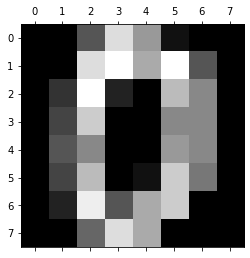

In [ ]:
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

**Rearrange Data**

In [ ]:
# rearrange Dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict ## Cross Validation
from sklearn.model_selection import train_test_split 

X, X_test, y_1, y_te = train_test_split(digits.images, digits.target, test_size=0.005, random_state=42)

# Rearrange output
y = np.zeros((len(y_1), 10))
y_test = np.zeros((len(y_te), 10))

for i in range(len(y_1)):
  y[i,int(y_1[i])] = 1
for i in range(len(y_te)):
  y_test[i,int(y_te[i])] = 1

predicted = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',]

**Building The Neural Network**

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras import regularizers
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,8,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(layers.Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

The **max pooling** operation reduces the size of the output feature of the previous layer, such that the parameters are reduced, and the computational cost and risk of overfitting as such.

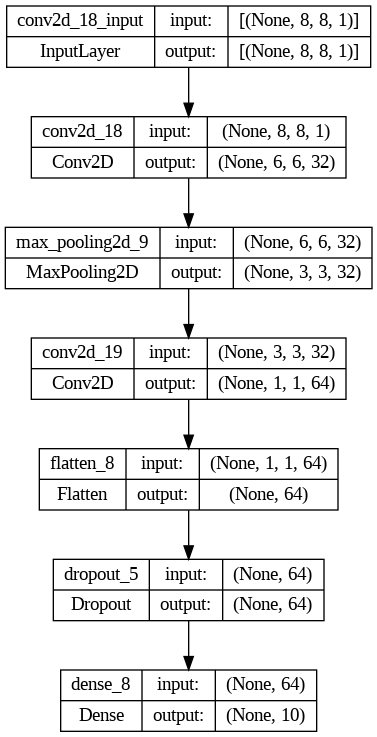

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

**Metrics Definition**

In [ ]:
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

**Model Compilation**

In [ ]:
# compile the neural network, for classification problems
model.compile(optimizer='RMSprop', loss='binary_crossentropy', 
              metrics=['accuracy', F1])

**Model Training & Validation**

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training.

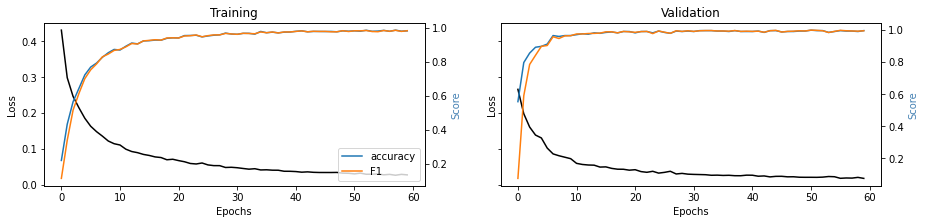

In [ ]:
# train/validation

training = model.fit(x=X, y=y, batch_size=64, epochs=60, shuffle=True, verbose=0, validation_split=0.2)

# plot  
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]   
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(training.history['loss'], color='black')    
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)    
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')    
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric)    
    ax22.set_ylabel("Score", color="steelblue")  

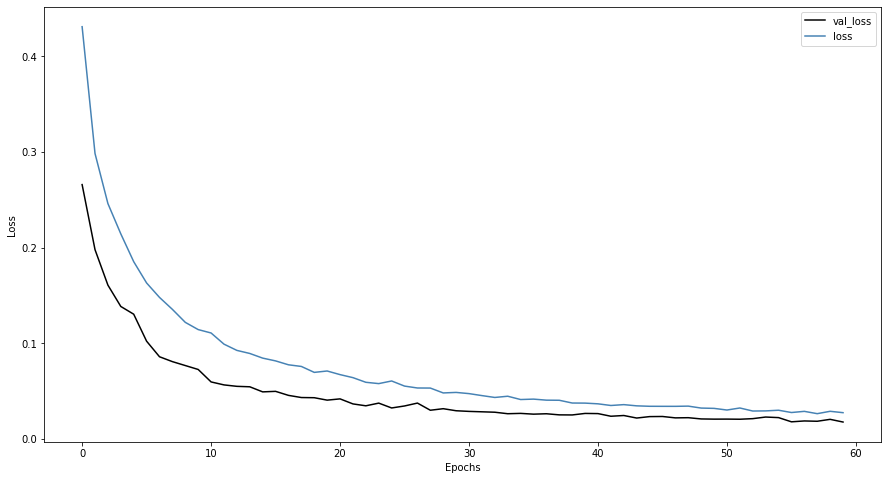

In [ ]:
## validation   
plt.figure(figsize=(15,8))   
plt.plot(training.history['val_loss'], color='black', label='val_loss') 
plt.plot(training.history['loss'], color='steelblue', label='loss')    
plt.xlabel('Epochs')    
plt.ylabel('Loss', color='black')    
plt.legend()

If in the validation metrics the loss increases and the accuracy decreases: this is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after few epochs, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

**Prediction with Layers investigation**

1/1 [==============================] - 0s 65ms/step


Text(0.5, 1.05, 'Third Layer')

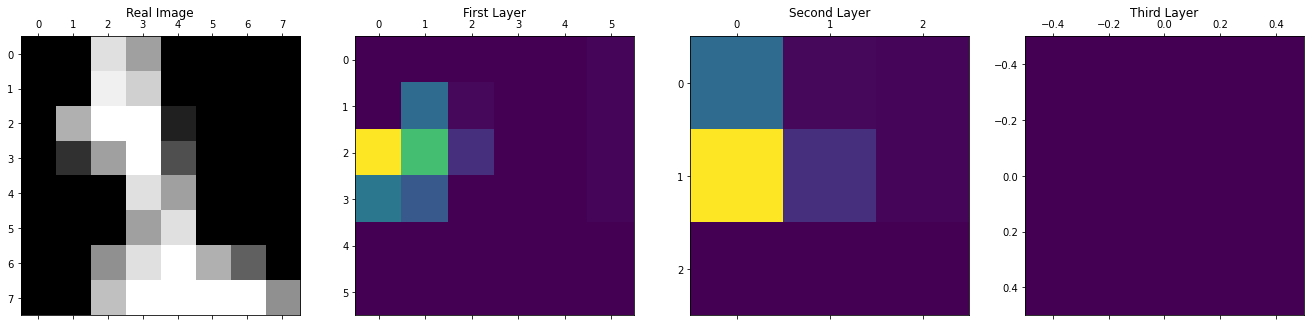

In [ ]:
from keras import models
import random

dat = X_test[random.randint(0,len(X_test[:,0]))-1,:].reshape(1,8,8)

layer_outputs = [layer.output for layer in model.layers[:4]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(dat)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(23,16))
ax1.matshow(np.reshape(dat, (8, 8)))
ax1.set_title('Real Image')
ax2.matshow(activations[0][0, :, :, 4], cmap='viridis')
ax2.set_title('First Layer')
ax3.matshow(activations[1][0, :, :, 4], cmap='viridis')
ax3.set_title('Second Layer')
ax4.matshow(activations[2][0, :, :, 4], cmap='viridis')
ax4.set_title('Third Layer')

**Prediction with Performances evaluation**

1/1 [==============================] - 0s 77ms/step


   real predicted
0     6         6
1     9         9
2     3         3
3     7         7
4     2         2
5     1         1
6     5         5
7     2         2
8     5         5


Accuracy: 100.0%


PREDICTIONS BELOW:




<Figure size 432x288 with 0 Axes>

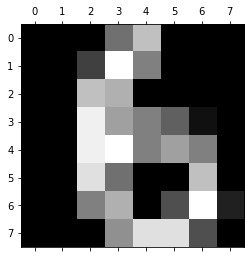

True number: 6
Recognized number: 6




<Figure size 432x288 with 0 Axes>

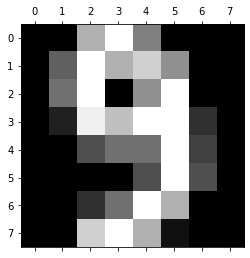

True number: 9
Recognized number: 9




<Figure size 432x288 with 0 Axes>

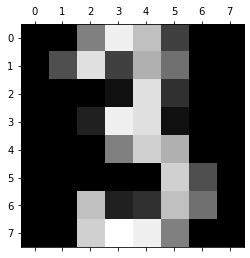

True number: 3
Recognized number: 3




<Figure size 432x288 with 0 Axes>

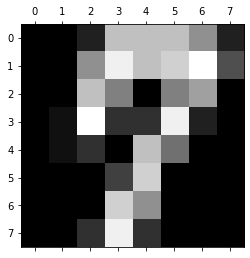

True number: 7
Recognized number: 7




<Figure size 432x288 with 0 Axes>

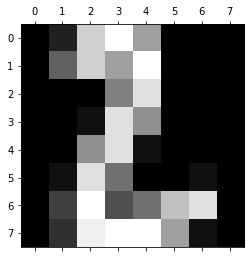

True number: 2
Recognized number: 2




<Figure size 432x288 with 0 Axes>

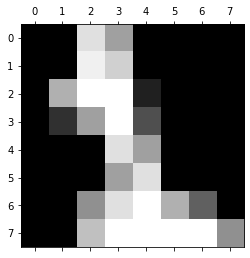

True number: 1
Recognized number: 1




<Figure size 432x288 with 0 Axes>

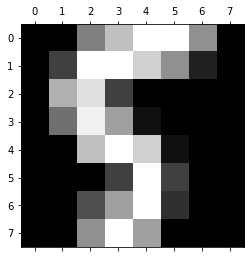

True number: 5
Recognized number: 5




<Figure size 432x288 with 0 Axes>

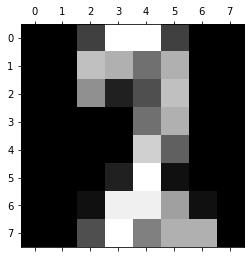

True number: 2
Recognized number: 2




<Figure size 432x288 with 0 Axes>

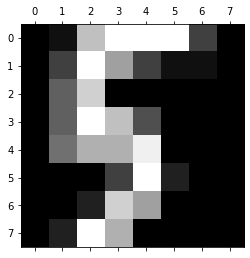

True number: 5
Recognized number: 5




In [ ]:
# Perform prediction 
prediction = model.predict(X_test)

# Rearranging predictions
X_pred = []
for i in range(0,len(prediction)):
  X_pred.append(predicted[np.argmax(prediction[i])])

# Accuracy evaluation

cont = 0
for i in range(0,len(X_pred)):
  if int(X_pred[i]) == y_te[i]:
    cont = cont + 1
accuracy = round(100*cont/len(X_pred), 2)

print('\n')
X_compare = pd.DataFrame()
X_compare['real'] = y_te
X_compare['predicted'] = X_pred
print(X_compare)
print('\n')
print('Accuracy: ' + str(accuracy) + '%')
print('\n')
print('PREDICTIONS BELOW:')
print('\n')

for i in range(0,len(X_test[:,0])):
   fi = np.reshape(X_test[i,:], (8, 8))
   plt.gray()
   plt.matshow(fi)
   plt.show()
   print('True number: ' + str(y_te[i]))
   print('Recognized number: ' + str(X_pred[i]))
   print('\n')